In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
def load_and_plot_csv(filename):
    # Lade die CSV-Datei mit pandas
    df = pd.read_csv(filename)

    # Überprüfe die ersten paar Zeilen, um sicherzustellen, dass die Daten korrekt geladen wurden
    print(df.head())

    # Funktion zum Berechnen des Durchschnitts und Herausfiltern der "Ausreißer"
    def filter_outliers(df, column_name):
        # Berechne den Durchschnitt der u und v Werte
        u_values = df[column_name].apply(lambda x: eval(x)[0])
        v_values = df[column_name].apply(lambda x: eval(x)[1])

        # Berechne den Durchschnitt
        u_mean = u_values.mean()
        v_mean = v_values.mean()

        # Definiere den Bereich um den Durchschnitt, innerhalb dessen Werte als "normal" betrachtet werden
        u_filtered = u_values[(u_values >= u_mean * 0.5) & (u_values <= u_mean * 1.5)]
        v_filtered = v_values[(v_values >= v_mean * 0.5) & (v_values <= v_mean * 1.5)]

        # Filtere alle Zeilen, die sowohl u als auch v innerhalb des tolerierten Bereichs haben
        valid_rows = df[u_values.isin(u_filtered) & v_values.isin(v_filtered)]
        return valid_rows

    # Filtere die Ausreißer für jedes der Koordinaten
    df_filtered_hook = filter_outliers(df, 'UV Hook')
    df_filtered_tip = filter_outliers(df, 'UV Tip')
    df_filtered_lowpoint = filter_outliers(df, 'UV Lowpoint')

    # Erstelle das Plot mit 3 Zeilen und 2 Spalten (3 Zeilen: Hook, Tip, Lowpoint; 2 Spalten: u und v)
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))

    # Plot für Hook
    axes[0, 0].plot(df_filtered_hook['Time (s)'], df_filtered_hook['UV Hook'].apply(lambda x: eval(x)[0]), label='u Hook', color='b')
    axes[0, 1].plot(df_filtered_hook['Time (s)'], df_filtered_hook['UV Hook'].apply(lambda x: eval(x)[1]), label='v Hook', color='b')
    axes[0, 0].set_ylabel('u (Hook)')
    axes[0, 1].set_ylabel('v (Hook)')
    axes[0, 0].set_title('Hook')
    axes[0, 0].grid(True)
    axes[0, 1].grid(True)
    axes[0, 0].legend()
    axes[0, 1].legend()

    # Setze y-Achse für Hook
    axes[0, 0].set_ylim(df_filtered_hook['UV Hook'].apply(lambda x: eval(x)[0]).min(), df_filtered_hook['UV Hook'].apply(lambda x: eval(x)[0]).max())
    axes[0, 1].set_ylim(df_filtered_hook['UV Hook'].apply(lambda x: eval(x)[1]).min(), df_filtered_hook['UV Hook'].apply(lambda x: eval(x)[1]).max())

    # Plot für Tip
    axes[1, 0].plot(df_filtered_tip['Time (s)'], df_filtered_tip['UV Tip'].apply(lambda x: eval(x)[0]), label='u Tip', color='g')
    axes[1, 1].plot(df_filtered_tip['Time (s)'], df_filtered_tip['UV Tip'].apply(lambda x: eval(x)[1]), label='v Tip', color='g')
    axes[1, 0].set_ylabel('u (Tip)')
    axes[1, 1].set_ylabel('v (Tip)')
    axes[1, 0].set_title('Tip')
    axes[1, 0].grid(True)
    axes[1, 1].grid(True)
    axes[1, 0].legend()
    axes[1, 1].legend()

    # Setze y-Achse für Tip
    axes[1, 0].set_ylim(df_filtered_tip['UV Tip'].apply(lambda x: eval(x)[0]).min(), df_filtered_tip['UV Tip'].apply(lambda x: eval(x)[0]).max())
    axes[1, 1].set_ylim(df_filtered_tip['UV Tip'].apply(lambda x: eval(x)[1]).min(), df_filtered_tip['UV Tip'].apply(lambda x: eval(x)[1]).max())

    # Plot für Lowpoint
    axes[2, 0].plot(df_filtered_lowpoint['Time (s)'], df_filtered_lowpoint['UV Lowpoint'].apply(lambda x: eval(x)[0]), label='u Lowpoint', color='r')
    axes[2, 1].plot(df_filtered_lowpoint['Time (s)'], df_filtered_lowpoint['UV Lowpoint'].apply(lambda x: eval(x)[1]), label='v Lowpoint', color='r')
    axes[2, 0].set_ylabel('u (Lowpoint)')
    axes[2, 1].set_ylabel('v (Lowpoint)')
    axes[2, 0].set_title('Lowpoint')
    axes[2, 0].grid(True)
    axes[2, 1].grid(True)
    axes[2, 0].legend()
    axes[2, 1].legend()

    # Setze y-Achse für Lowpoint
    axes[2, 0].set_ylim(df_filtered_lowpoint['UV Lowpoint'].apply(lambda x: eval(x)[0]).min(), df_filtered_lowpoint['UV Lowpoint'].apply(lambda x: eval(x)[0]).max())
    axes[2, 1].set_ylim(df_filtered_lowpoint['UV Lowpoint'].apply(lambda x: eval(x)[1]).min(), df_filtered_lowpoint['UV Lowpoint'].apply(lambda x: eval(x)[1]).max())

    # Achsenbeschriftung für alle Subplots
    for ax in axes.flat:
        ax.set_xlabel('Time (s)')

    # Layout anpassen, damit es übersichtlicher aussieht
    plt.tight_layout()

    # Zeige das Plot an
    plt.show()

       Time (s)                               UV Hook  \
0  6.510018e-07  [611.6123046875, 222.82400512695312]   
1  1.240936e-02  [611.6123046875, 222.82400512695312]   
2  1.287021e-02  [611.6123046875, 222.82400512695312]   
3  1.339393e-02  [611.6123046875, 222.82400512695312]   
4  1.439024e-02  [611.6123046875, 222.82400512695312]   

                                 UV Tip  \
0  [775.5634765625, 313.69049072265625]   
1  [775.5634765625, 313.69049072265625]   
2  [775.5634765625, 313.69049072265625]   
3  [775.5634765625, 313.69049072265625]   
4  [775.5634765625, 313.69049072265625]   

                              UV Lowpoint  
0  [676.1827392578125, 373.2541809082031]  
1  [676.1827392578125, 373.2541809082031]  
2  [676.1827392578125, 373.2541809082031]  
3  [676.1827392578125, 373.2541809082031]  
4  [676.1827392578125, 373.2541809082031]  


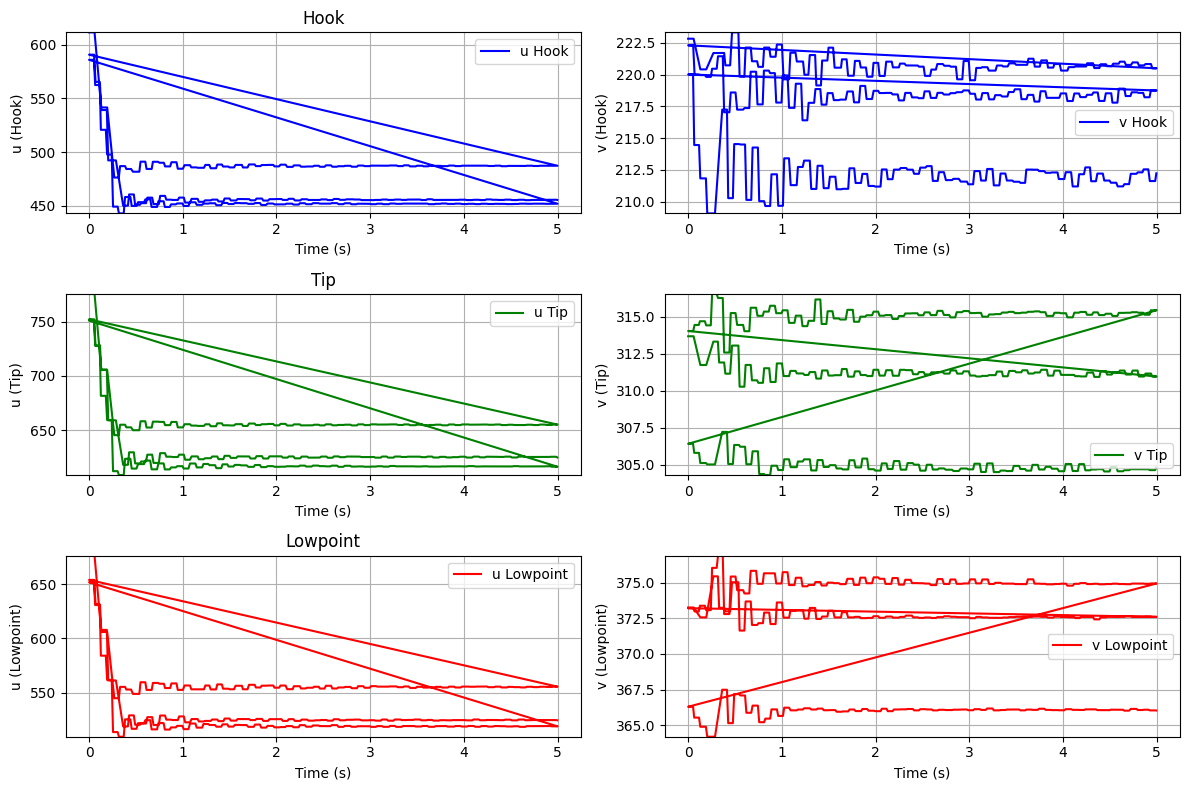

In [28]:
# Beispiel: CSV-Datei laden und plotten
filename = '/home/mo/Thesis/src/robot_control/robot_control/vibration_measurement.csv'  # Ändere den Dateinamen nach Bedarf
load_and_plot_csv(filename)